# Mushroom Classification: Edible or Poisonous?
By Alina Nikitina
## Introduction
### A brief history
Mushrooms have been part of various culture's diets dating back to ancient times, roughly 13,000 years ago.
This is likely due to their impressive [health benefits](https://www.uclahealth.org/news/7-health-benefits-of-mushrooms).
You can learn more about the history of human mushroom consumption [here](https://rrcultivation.com/blogs/mn/exploring-the-role-of-mushrooms-throughout-history).
Even though mushrooms have been consumed by people for thousands of years, there are species of this fungi known to be poisonous to humans.<br>
The National Institute of Health estimates there are over 5000 mushroom species worldwide. Only 25% of these species has been named, and of this quarter, 3% are poisonous.
While we may never know how our ancestors were able to distinguish between edible and poisonous mushrooms, nowadays we have lots of resources to make these distinctions.<br><br>
### Why you'll benefit from this mushroom edible/poisonous predictor<br>
Should you ever find yourself stranded in nature, in dire need of food, look to the ground for mushrooms! This model takes as input the mushroom characteristics described above and will predict whether the mushroom is edible or poisonous.<br><br>
### Characteristics of mushrooms
If you're not sure how to distinguish the parts of a mushroom, read more about mushroom identification [here](https://sciencing.com/identify-poisonous-mushrooms-2057768.html).
Each part of the mushroom has characteristics such as color, shape, texture, etc.
Parts of a mushroom include:
<ol>
    <li>cap</li>
    <li>stem</li>
    <li>gills</li>
    <li>ring</li>
</ol>



## Data Collection
### Importing libraries and data
First, let's import all the libraries we need, as well as the dataset itself.<br>
The data is in a comma separated value (CSV) file, which we will store in a pandas dataframe. Call that dataframe 'df'.

In [724]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore');
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

df = pd.read_csv('mushrooms.csv');
display(df);
%store df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Stored 'df' (DataFrame)


## Data Processing

### Replacing abbreviated values with characteristics
As you can see, we have access to many characteristics of mushrooms, with 23 features, one of which is the actual class of the mushroom (poisonous or edible).<br>
However, all of our feature values are abbreviated, making it difficult to understand what they represent. Let's replace the abbreviations with the full characteristic phrases.

In [725]:
df['class'].replace(['p', 'e'], ['poisonous', 'edible'], inplace=True);
df['cap-shape'].replace(['b', 'c', 'x', 'f', 'k', 's'], ['bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken'], inplace=True)
df['cap-surface'].replace(['f', 'g', 'y', 's'], ['fibrous', 'grooves', 'scaly', 'smooth'], inplace=True);
df['cap-color'].replace(['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow'], inplace=True);
df['bruises'].replace(['t', 'f'], ['true', 'false'], inplace=True)
df['odor'].replace(['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy'], inplace=True)
df['gill-attachment'].replace(['a', 'd', 'f', 'n'], ['attached', 'descending', 'free', 'notched'], inplace=True);
df['gill-spacing'].replace(['c', 'w', 'd'], ['close', 'crowded', 'distant'], inplace=True);
df['gill-size'].replace(['b', 'n'], ['broad', 'narrow'], inplace=True);
df['gill-color'].replace(['k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'], ['black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow'], inplace=True);
df['stalk-shape'].replace(['e', 't'], ['enlarging', 'tapering'], inplace=True);
df['stalk-root'].replace(['b', 'c', 'u', 'e', 'z', 'r'], ['bulbous', 'club', 'cup', 'equal', 'rhizomorphs', 'rooted'], inplace=True);
df['stalk-surface-above-ring'].replace(['f', 'y', 'k', 's'], ['fibrous', 'scaly', 'silky', 'smooth'], inplace=True);
df['stalk-surface-below-ring'].replace(['f', 'y', 'k', 's'], ['fibrous', 'scaly', 'silky', 'smooth'], inplace=True);
df['stalk-color-above-ring'].replace(['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'], inplace=True);
df['stalk-color-below-ring'].replace(['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'], inplace=True);
df['veil-type'].replace(['p', 'u'], ['partial', 'universal'], inplace=True);
df['veil-color'].replace(['n', 'o', 'w', 'y'], ['brown', 'orange', 'white', 'yellow'], inplace=True);
df['ring-number'].replace(['n', 'o', 't'], [0, 1, 2], inplace=True);
df['ring-type'].replace(['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'], ['cobwebby', 'evanescent', 'flaring', 'large', 'none', 'pendant', 'sheathing', 'zone'], inplace=True);
df['spore-print-color'].replace(['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'], ['black', 'brown', 'buff', 'chocolate', 'green', 'orange', 'purple', 'white', 'yellow'], inplace=True);
df['population'].replace(['a', 'c', 'n', 's', 'v', 'y'], ['abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary'], inplace=True);
df['habitat'].replace(['g', 'l', 'm', 'p', 'u', 'w', 'd'], ['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods'], inplace=True);
%store df
display(df);

Stored 'df' (DataFrame)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,true,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,true,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,true,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,true,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,edible,convex,smooth,gray,false,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,false,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,1,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,false,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,1,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,false,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,1,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,false,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,1,evanescent,white,several,leaves


### Dropping columns with missing values
Now we can understand what the characteristics of our mushrooms mean.<br>
Next up, let's see which columns (mushroom characteristics) have feature values that are missing.

In [726]:
cols_with_missing_values = [];
cols = df.columns.values;

# for each feature
for idx, row in df.iterrows():
    # for each feature value
    for i, col in enumerate(cols):
        # if the feature value is missing and the feature is not in the list of features (columns) that have missing data
        if row[col] == '?' and col not in cols_with_missing_values:
            # add the feature to the list of features with missing data
            cols_with_missing_values.append(col);

print("Column(s) with missing values: ")
for feature in cols_with_missing_values:
    print("- " + feature);

# drop columns that have missing data
df.drop(cols_with_missing_values, axis=1, inplace=True);
display(df);

Column(s) with missing values: 
- stalk-root


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,true,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,true,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,true,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,true,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,edible,convex,smooth,gray,false,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,false,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,1,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,false,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,1,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,false,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,1,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,false,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,1,evanescent,white,several,leaves


It looks like only one feature has missing values: stalk-root.<br>
Let's drop that column. We now have 22 features, 1 of which is the actual class of mushroom.<br>
In order to do supervised learning for binary classification, we must change our class feature values from edible and poisonous to 0 and 1.<br>

### Replacing class characteristics with numerical values

In [727]:
display(df['class'].replace(['poisonous', 'edible'], [1, 0]));

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

### One hot encoding
The next part of data processing is one hot encoding our data. This is done when categorical variables are non-numerical. Simply assigning each category a number can mess up our supervised learning models (ex. if we assign 0 to red and 5 to green, green will have a much higher value, but that's not representative of color). Instead of assigning each category a number, we use one hot encoding, where we create a column for each possible feature value of the original feature. Each observation will have a 1 in the column that corresponds to its feature value, and 0 in the rest of the value columns (of that feature). Read more about one hot encoding data [here](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/).

In [728]:
df_for_ml = df;
df_for_ml['class'].replace(['poisonous', 'edible'], [1, 0], inplace=True);
# dependent variable -- class
y = df_for_ml['class'];
# drop the dependent variable
df_for_ml = df_for_ml.drop(['class'], axis=1);
# one hot encoding of remaining independent variables
x = pd.get_dummies(df_for_ml, columns=df_for_ml.columns.values);
df_for_vis = pd.get_dummies(df, columns=df_for_ml.columns.values);
%store y
%store x
%store df_for_vis
display(x);

Stored 'y' (Series)
Stored 'x' (DataFrame)
Stored 'df_for_vis' (DataFrame)


,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8122,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


We now have wayyyy more columns (features), because there are now as many variables as there were categories for each original variable. Such is life.

### Removing 'perfectly correlated' variables
We need to remove heavily correlated variables. Correlation means a mutual relationship between variables. Any variables with a correlation greater than |0.95| are removed. This is because it's easier/faster to run models on data that's lower in dimensions. So if we have 2 variables with high correlation, we can remove one of them which removes a dimension.
We start by creating a correlation matrix, which correlates every variable against every other variable, and assigns a value between -1 and 1. I take the absolute values of that matrix. Then, I store only the upper triangle of the matrix, since the matrix is mirrored on the diagonal, with diagonal values of 1.

In [729]:
%store -r
corr_matrix = x.corr().abs()
display(corr_matrix);
# upper triangle of correlation matrix
upper_tri = np.triu(corr_matrix, k=1);
column_names = x.columns.values;
indices_to_drop = [];
# iterate over arrays in correlation matrix
for arr in upper_tri:
    # iterate over elements in array
    for idx, el in enumerate(arr):
        # if the (absolute) correlation value is too large and the column index has not been added to drop list yet, add the index to the drop list
        if el > 0.95 and idx not in indices_to_drop:
            indices_to_drop.append(idx);
indices_to_drop.sort();
to_drop = [];
# for each index to drop
for idx in indices_to_drop:
    # add the column name associated with the index to a list of column names to drop
    to_drop.append(column_names[idx]);
# drop the columns
x.drop(to_drop, axis=1, inplace=True);
# display the updated data frame
display(x);
%store x

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
cap-shape_bell,1.000000,0.005387,0.219564,0.193260,0.081769,0.015264,0.091638,0.018820,0.027947,0.117712,...,0.158702,0.168381,0.120154,0.149151,0.010113,0.374316,0.095178,0.052871,0.037764,0.182037
cap-shape_conical,0.005387,1.000000,0.020077,0.017672,0.007477,0.001396,0.014032,0.249631,0.015893,0.015038,...,0.009456,0.022075,0.011469,0.013306,0.065707,0.004286,0.008985,0.004835,0.003453,0.017653
cap-shape_convex,0.219564,0.020077,1.000000,0.720235,0.304733,0.056884,0.063511,0.020077,0.019137,0.040634,...,0.059264,0.060421,0.044626,0.023197,0.096639,0.004529,0.029042,0.002845,0.036493,0.071773
cap-shape_flat,0.193260,0.017672,0.720235,1.000000,0.268226,0.050070,0.064801,0.006285,0.029076,0.093397,...,0.075804,0.034625,0.111346,0.017982,0.052326,0.129312,0.021891,0.030636,0.017450,0.074986
cap-shape_knobbed,0.081769,0.007477,0.304733,0.268226,1.000000,0.021185,0.158942,0.010863,0.015261,0.137988,...,0.089360,0.172707,0.170081,0.113404,0.235108,0.065047,0.090538,0.073380,0.119003,0.089230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_meadows,0.374316,0.004286,0.004529,0.129312,0.065047,0.012142,0.122077,0.004286,0.039697,0.077081,...,0.152473,0.144434,0.099772,0.115762,0.065222,1.000000,0.078170,0.042059,0.030041,0.153579
habitat_paths,0.095178,0.008985,0.029042,0.021891,0.090538,0.025458,0.086727,0.008985,0.117915,0.039574,...,0.125366,0.169228,0.040714,0.242715,0.136749,0.078170,1.000000,0.088184,0.062986,0.322005
habitat_urban,0.052871,0.004835,0.002845,0.030636,0.073380,0.288697,0.011913,0.004835,0.100248,0.117548,...,0.130450,0.001180,0.042888,0.130592,0.073577,0.042059,0.088184,1.000000,0.033889,0.173254
habitat_waste,0.037764,0.003453,0.036493,0.017450,0.119003,0.009784,0.098365,0.003453,0.031986,0.062109,...,0.066282,0.154742,0.080392,0.093276,0.052553,0.030041,0.062986,0.033889,1.000000,0.123748


,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8122,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


Stored 'x' (DataFrame)


### Splitting data into training/testing & scaling the data
We need to use some of our data to train the supervised learning algorithms. Typically, a recommended split is using 80% of the data to train, and 20% of the data to test.<br>
After we split the data, we must scale the training data. Scaling data puts points closer together to make the distances between points closer. The proportions stay the same, but decreased distances increases the certainty of the algorithm. Learn more about scaling data [here](https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/#:~:text=So%20if%20the%20data%20in,between%20them%20will%20be%20lower).

In [730]:
# we will use 80 percent of the data for training, and 20 percent of the data for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2);
# scale the data
scaler = StandardScaler().fit(x_train);
x_train = scaler.transform(x_train);
%store x_train
%store x_test
%store y_train
%store y_test

Stored 'x_train' (ndarray)
Stored 'x_test' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_test' (Series)


## Exploratory Data Analysis and Data Visualization
### Basic information about dataset

In [731]:
poisonous_df = df[df['class'] == 1];
edible_df = df[df['class'] == 0];
num_mushrooms = len(df.index);
num_poisonous = len(poisonous_df.index);
num_edible = len(edible_df.index);
percent_poisonous = (num_poisonous / num_mushrooms) * 100;
percent_edible = (num_edible / num_mushrooms) * 100;

There are 8124 mushrooms in our dataset.<br>
3916 of those mushrooms are poisonous, amounting to 48.2% of the dataset.<br>
4208 of those mushrooms are edible, amounting to 51.8% of the dataset.<br>
Our data is evenly split between edible and poisonous mushrooms.<br>
Now let's visualize our data; the first thing you're probably going to notice about a mushroom is its cap color.

### Visualizing the most visual characteristics

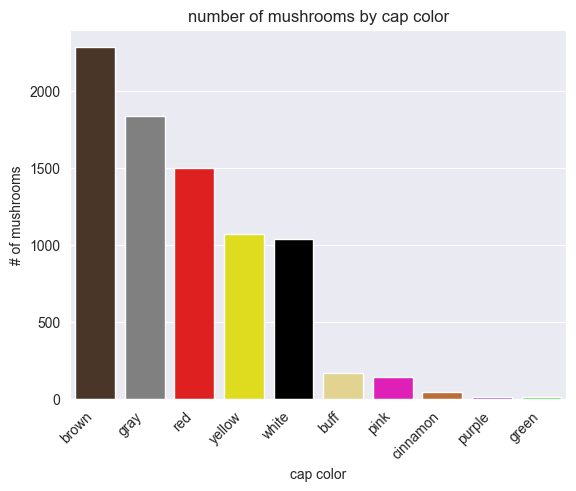

In [732]:
# create a frequency plot of each mushroom cap color
sns.countplot(x='cap-color', data=df, order=df['cap-color'].value_counts().index, palette=['#4E3524', '#808080', '#FF0000', '#FFFB00', '#000000', '#F0DC82', '#FF00C9', '#D2691E', '#A020F0', '#00FF00']);
plt.xticks(rotation=45, ha="right");
plt.xlabel('cap color');
plt.ylabel('# of mushrooms');
plt.title('number of mushrooms by cap color');
plt.show();

As we can see in the count plot, the majority of mushrooms in our set are brown, making up over 25% of the dataset. The next contenders are mushrooms with gray caps, then red.<br>
Another piece of information you're first going to notice when foraging for mushrooms is the habitat you're in. Let's look at the number of mushrooms in this dataset within each habitat.

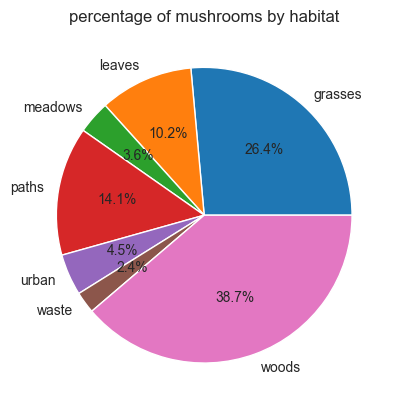

In [733]:
%store -r
habitat_data = {'grasses': (df[df['habitat'] == 'grasses']).shape[0], 'leaves': (df[df['habitat'] == 'leaves']).shape[0], 'meadows': (df[df['habitat'] == 'meadows'] ).shape[0], 'paths': (df[df['habitat'] == 'paths']).shape[0], 'urban': (df[df['habitat'] == 'urban']).shape[0], 'waste': (df[df['habitat'] == 'waste']).shape[0], 'woods': (df[df['habitat'] == 'woods']).shape[0]};
plt.pie(list(habitat_data.values()), labels=list(habitat_data.keys()), autopct='%1.1f%%');
plt.title('percentage of mushrooms by habitat');
plt.show();

Over 1/3 of the mushrooms in our dataset are found in the woods, and about 1/4 are found in grasses, so if you're foraging near one of these habitats, this model is likely more accurate for you!

### Visualizing the most common traits of poisonous mushrooms
Before we use a machine learning model to predict whether a mushroom is poisonous or edible, let's use common sense!<br>
Below are listed the main characteristics to look out for when spotting poisonous mushrooms, taken from [this article](https://environment.co/how-to-identify-poisonous-mushrooms/). Let's see if our data represents these typical characteristics of poisonous mushrooms:
 lists some characteristics to look out for when detecting poisonous mushrooms:<br>
1. white gill color
2. red cap color
3. fishy odor

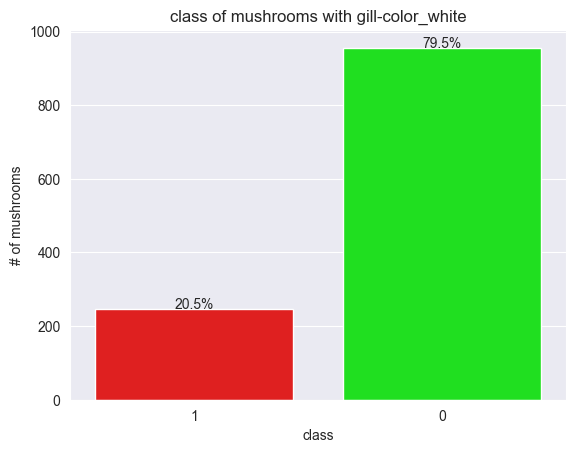

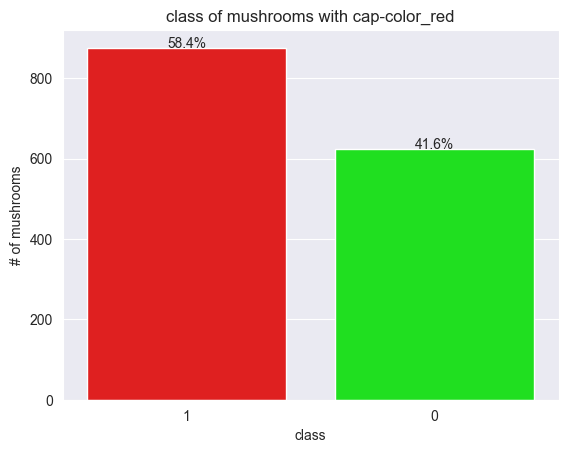

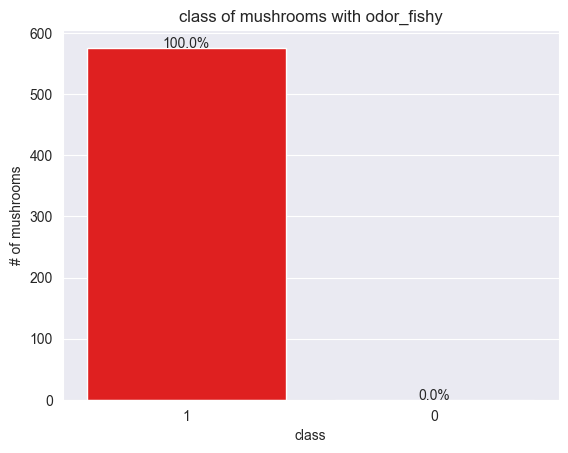

In [734]:
# characteristics we want to visualize
characteristics = ['gill-color_white', 'cap-color_red', 'odor_fishy'];
# for each characteristic
for characteristic in characteristics:
    # get partial dataframe with observations that have specified characteristic
    sub_df = df_for_vis[df_for_vis[characteristic] == 1];
    # plot poisonous mushroom frequency first
    bar_order = [1, 0];
    # plot frequency by class (edible or poisonous)
    ax = sns.countplot(x='class', data=sub_df, palette=['#FF0000','#00FF00'], order=bar_order);
    patches = ax.patches;
    # get percent of mushrooms for that class
    percentage = [((len(sub_df[sub_df['class'] == 1])/len(sub_df)) * 100), ((len(sub_df[sub_df['class'] == 0])/len(sub_df)) * 100)];
    # show percentages on plot
    for i in range(len(patches)):
       x = patches[i].get_x() + patches[i].get_width() / 2;
       y = patches[i].get_height() + .05;
       ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center');
    plt.ylabel('# of mushrooms');
    plt.title('class of mushrooms with ' + characteristic);
    plt.show();

Even though white gill color is supposed to be one of the most telling traits of poisonous mushrooms, ~80% of the mushrooms in our dataset with white gills are edible!<br>
Red cap color is a little more representative, with over half of mushrooms with a red cap color being poisonous in our dataset, but that is still almost a random guess when we forage! Not! good!<br>
The only top characteristic of poisonous mushrooms that our data upholds is a fishy odor. All the mushrooms in our dataset that have a fishy odor are poisonous.

## Machine Learning & Analysis
Now let's try out a few machine learning algorithms for binary classification, and compare their effectiveness. Hopefully they work better than our initial predictions.

### Accuracy, precision, recall
First we instantiate all of our supervised learning algorithms and create dictionaries to store each algorithm's accuracy, precision, and recall.<br>
Accuracy measures the number of classifications an algorithm predicted correctly out of the total number of classifications.<br>
Precision measures true negatives against false positives.<br>
Recall is the opposite of precision -- it measures false negatives against true positives.<br>
Learn more about these terms and what they measure [here](https://blog.floydhub.com/a-pirates-guide-to-accuracy-precision-recall-and-other-scores/).

### Supervised learning algorithms
After we remove features that were highly correlated to other features, we now have 98 features left (with one hot encoding).
Now that we have lowered the dimension of our dataset, we can perform supervised learning algorithms to predict mushroom classification.<br>
There are 5 machine learning algorithms we will use:<br>
[Logistic regression](https://www.kdnuggets.com/2022/07/logistic-regression-work.html) is a model that sums independent variables and calculates the logistic result.<br>
[Support vector machines](https://www.ibm.com/docs/en/spss-modeler/saas?topic=models-how-svm-works) map data to a high dimensional feature space to make it categorizeable.<br>
[Decision trees](https://www.mastersindatascience.org/learning/machine-learning-algorithms/decision-tree/#:~:text=A%20decision%20tree%20is%20a,that%20contains%20the%20desired%20categorization) work by calculating the likeliness of every combination of feature values, and constructing a tree that answers one question a time to reach the classification.<br>
[Random forest](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#:~:text=A.%20Random%20Forest%20is%20a,model%20is%20a%20decision%20tree) uses bagging, which trains data in subsets of the training dataset. The final classification output combines the outputs of all these smaller training sets. This bagging is applied to decision trees.<br>
[K-nearest neighbor](https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4#:~:text=K%2Dnearest%20neighbors%20(KNN),closet%20to%20the%20test%20data) predicts the class by calculating the distance between training and test data points.<br>
Read more about all these supervised learning algorithms by clicking on their names!


For each of the supervised learning algorithms, I fit the model, make the predictions, calculate (accuracy, precision, recall), and build the confusion matrix.<br>
The confusion matrix shows true/false positive/negatives; read more about confusion matrices [here](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62).

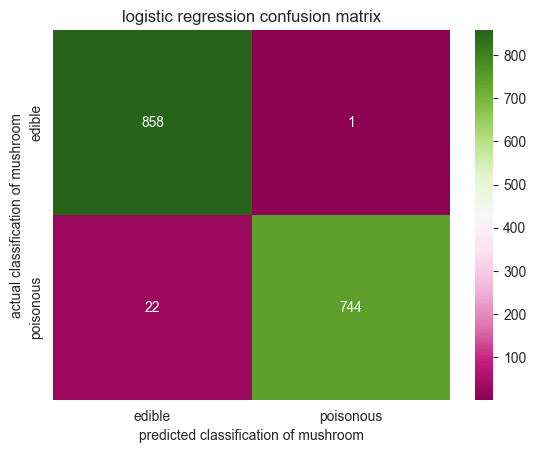

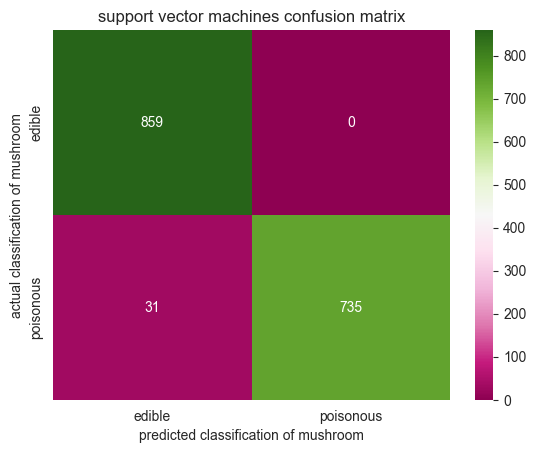

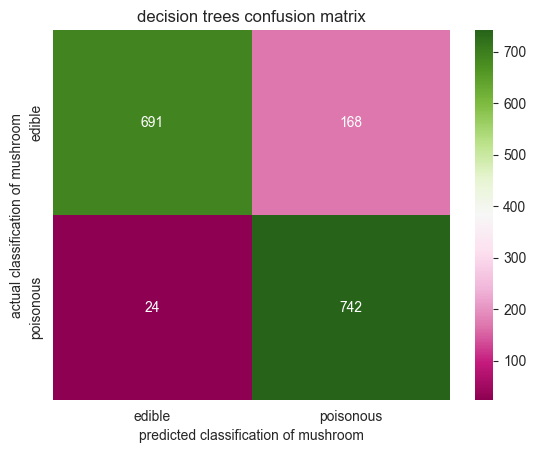

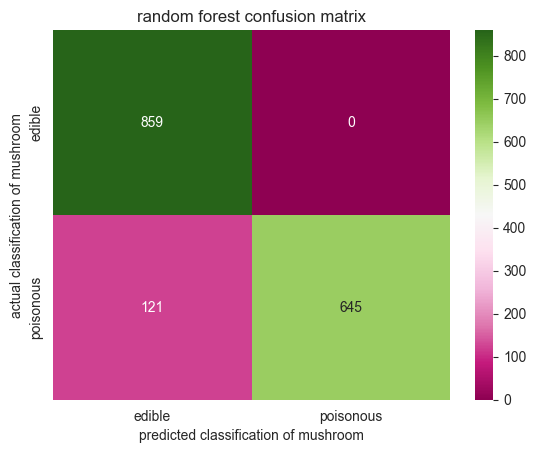

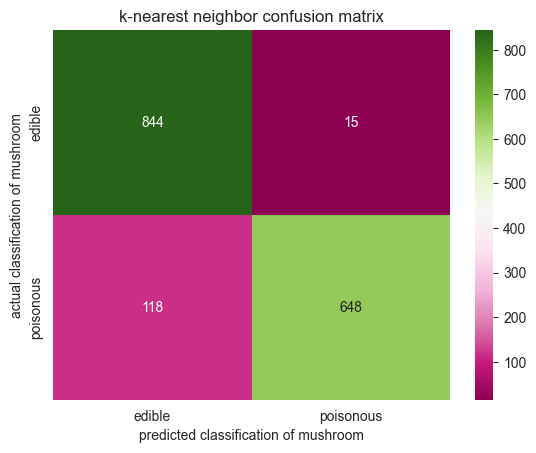

Stored 'accuracy' (dict)
Stored 'precision' (dict)
Stored 'recall' (dict)


In [735]:
%store -r
models = {};
# logistic regression
models['logistic regression'] = LogisticRegression();
# vector machines
models['support vector machines'] = LinearSVC();
# decision trees
models['decision trees'] = DecisionTreeClassifier();
# random forest
models['random forest'] = RandomForestClassifier();
# k-nearest neighbors
models['k-nearest neighbor'] = KNeighborsClassifier();
accuracy, precision, recall = {}, {}, {};
# for each model
for key in models.keys():
    # fit the classifier
    models[key].fit(x_train, y_train);
    # make prediction
    y_pred = models[key].predict(x_test);
    # calculate metrics
    accuracy[key] = accuracy_score(y_test, y_pred) * 100;
    precision[key] = precision_score(y_test, y_pred) * 100;
    recall[key] = recall_score(y_test, y_pred) * 100;
    # build confusion matrix
    ConfusionMatrix = confusion_matrix(y_test, y_pred);
    ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='PiYG', fmt='g');
    ax.set_title(key + ' confusion matrix');
    ax.set_xlabel('predicted classification of mushroom');
    ax.set_ylabel('actual classification of mushroom');
    ax.xaxis.set_ticklabels(['edible','poisonous']);
    ax.yaxis.set_ticklabels(['edible','poisonous']);
    plt.show();
%store accuracy
%store precision
%store recall

### Analysis
Here, I compare the accuracy, precision, and recall of all the algorithms used.<br>
Logistic regression and support vector machines give us the highest accuracy at 98%.<br>
Next are random forest and k-nearest neighbor with 93%.<br>
The decision tree algorithm comes in last place, with accuracy of 88%.<br>
Let's analyze the precision and recall of the top two contenders. Maximizing one of these metrics comes at the cost of the other.<br>
In the case of logistic regression, precision is higher and recall is lower.<br>
The same is the case for support vector machines; precision is higher and recall is lower.<br>

In [736]:
%store -r
df_model = pd.DataFrame(index=models.keys(), columns=['accuracy', 'precision', 'recall']);
df_model['accuracy'] = accuracy.values();
df_model['precision'] = precision.values();
df_model['recall'] = recall.values();
df_model

,accuracy,precision,recall
logistic regression,98.584615,99.865772,97.127937
support vector machines,98.092308,100.000000,95.953003
decision trees,88.184615,81.538462,96.866841
random forest,92.553846,100.000000,84.203655
k-nearest neighbor,91.815385,97.737557,84.595300


## Interpretation: Insight & Policy Decision
Our analysis and modeling tells us that:
1. We should watch out for mushrooms with a fishy odor as they are highly likely to be poisonous.
2. Don't take your chances on mushrooms with white gills or red caps, even though they may be edible.
3. When we construct a logistic regression model on 21 characteristics of mushrooms, we can predict whether the mushroom is edible/poisonous with 98% accuracy!

Check out the links sprinkled throughout this data science pipeline for more information on processing data and supervised learning algorithms for binary classification! :)